# Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

# our layers - you can add more if you want
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [3]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 64 images belonging to 3 classes.


In [4]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 58 images belonging to 3 classes.


In [5]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\alvia\AppData\Local\Temp\ipykernel_14244\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 11s 5s/step - loss: 4.4817 - accuracy: 0.2969 - val_loss: 13.9782 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 14.5748 - accuracy: 0.3906 - val_loss: 7.2444 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 4s/step - loss: 5.0118 - accuracy: 0.4375 - val_loss: 6.2013 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 5s 4s/step - loss: 6.4568 - accuracy: 0.3125 - val_loss: 5.8087 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 5s 4s/step - loss: 6.4609 - accuracy: 0.3125 - val_loss: 3.5547 - val_accuracy: 0.5345
Epoch 6/50
2/2 [==============================] - 5s 4s/step - loss: 2.3479 - accuracy: 0.4844 - val_loss: 2.4767 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 5s 4s/step - loss: 2.3195 - accuracy: 0.4688 - val_loss: 5.1827 - val_accuracy: 0.3276
Epoch 8/50
2/2 [======================

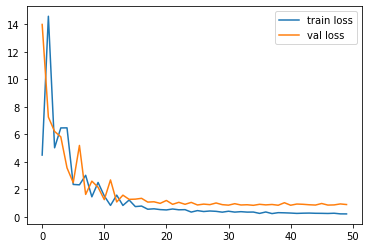

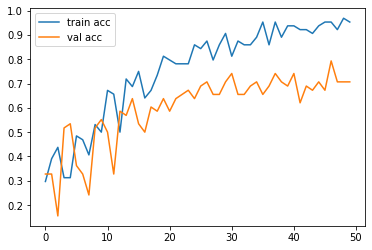

<Figure size 432x288 with 0 Axes>

In [6]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')
 
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 4s 1s/step


array([[1.37777105e-02, 8.96802187e-01, 8.94201249e-02],
       [7.57794351e-06, 1.31424968e-04, 9.99861002e-01],
       [2.95343511e-02, 1.33645777e-02, 9.57101047e-01],
       [1.88842118e-02, 9.79375422e-01, 1.74036296e-03],
       [1.80003326e-02, 3.28013231e-03, 9.78719532e-01],
       [3.10171824e-02, 1.00322977e-01, 8.68659854e-01],
       [5.02359029e-03, 3.55386958e-02, 9.59437728e-01],
       [3.87118477e-03, 9.71522927e-01, 2.46058796e-02],
       [1.16928697e-01, 6.15929782e-01, 2.67141551e-01],
       [1.82352811e-01, 5.70829451e-01, 2.46817842e-01],
       [3.05564143e-02, 7.34151363e-01, 2.35292226e-01],
       [8.68581116e-01, 1.20518520e-01, 1.09003764e-02],
       [8.36792663e-02, 3.52780968e-01, 5.63539743e-01],
       [1.37833960e-03, 6.90729916e-01, 3.07891756e-01],
       [2.72589713e-01, 6.68085277e-01, 5.93250692e-02],
       [5.30757755e-03, 3.32917482e-01, 6.61774933e-01],
       [2.18003001e-02, 1.45293966e-01, 8.32905769e-01],
       [3.12223602e-02, 8.32140

In [8]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2], dtype=int64)

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [10]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [11]:
x.shape

(224, 224, 3)

In [12]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [13]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.3359975e-04, 7.3033589e-04, 9.9913615e-01]], dtype=float32)

In [14]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

1/1 [==============================] - 0s 97ms/step


array([False])